<a href="https://colab.research.google.com/github/andrecauss/causs_data_science/blob/master/Time_Series_Produto_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Libraries needed for the tutorial

import pandas as pd
import requests
import io
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25, 6

# Username of your GitHub account

username = 'andrecauss'

# Personal Access Token (PAO) from your GitHub account

token = '1072b428e6d6faaa5cc90a638bd8851cc0a6a833'

# Creates a re-usable session object with your creds in-built

github_session = requests.Session()
github_session.auth = (username, token)
    
# Downloading the csv file from your GitHub

url = "https://raw.githubusercontent.com/andrecauss/causs_private_projects/master/vendas.csv?token=AGARLDBC7ZGHXCEZWFLR3GK64AQHC" # Make sure the url is the raw version of the file on GitHub
download = github_session.get(url).content

# Reading the downloaded content and making it a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))


In [0]:
df.Data = pd.to_datetime(df.Data)

In [0]:
df.dtypes

Material              object
Mês                   object
Data          datetime64[ns]
Quantidade             int64
dtype: object

In [0]:
df.drop('Mês', axis=1, inplace=True)

In [0]:
df.dtypes

Material              object
Data          datetime64[ns]
Quantidade             int64
dtype: object

In [0]:
newdf = df.resample('M', on='Data').sum()

newdf = newdf.loc[newdf.index >= '2019-06-01']

print(newdf)

            Quantidade
Data                  
2019-06-30       44790
2019-07-31       59970
2019-08-31       50430
2019-09-30       48870
2019-10-31       56040
2019-11-30       51810
2019-12-31       72690
2020-01-31       47160
2020-02-29       43140
2020-03-31       34470
2020-04-30       11970
2020-05-31       37470


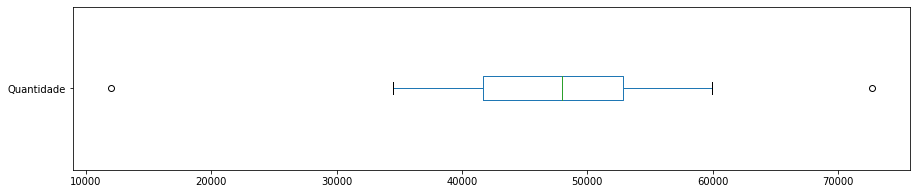

In [0]:
newdf.plot(kind='box', vert=False, figsize=[15,3]);